In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
 

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Amazon_reviews_after_sentiment.csv')
df.head()

,asin,rating,reviews,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,Good_reviews,polarity,subjectivity
0,B07HBDNGHC,4.0,auf die funktion der box gehe ich nur kurz ein...,165,43,0,3,0,352,2108,5.0,1.0,0.23,0.59
1,B07HBDNGHC,4.0,ich hielt die toniebox immer für einen überteu...,542,174,0,6,7,1135,7647,5.7,1.0,0.50,0.86
2,B07HBDNGHC,5.0,die box ist ein hübsches gerät leider ist sie ...,29,9,0,1,0,57,333,4.9,1.0,0.00,0.00
3,B07HBDNGHC,5.0,hier muss ich einfach bewertenbin super zufrie...,27,9,0,1,0,56,334,5.0,1.0,0.33,0.67
4,B07HBDNGHC,5.0,wir lieben die toniebox sie ist mega praktisch...,9,3,0,0,0,24,159,5.7,1.0,0.33,0.67


In [5]:
df['reviews']= df['reviews'].astype(str)

TF-IDF

In [51]:
X= df.reviews
y= df.Good_reviews.values 

X_train, X_test, y_train, y_test = train_test_split( 
           X, y, test_size = 0.25, random_state = 820) 


print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(4409,) (4409,)
(1470,) (1470,)


In [52]:
tfi = TfidfVectorizer(ngram_range=(1,3), max_features = 2000)

X_train_tfi = tfi.fit_transform(X_train).toarray() 
X_test_tfi = tfi.transform(X_test).toarray() 

Logistic Regression

In [53]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfi, y_train)
cv_logreg= logreg.fit(X_train_tfi, y_train)

# predicting test set results 
y_pred_log = logreg.predict(X_test_tfi)

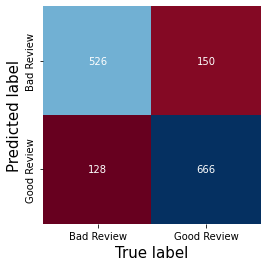

In [54]:
# confusion matrix 
cm = confusion_matrix(y_test, y_pred_log) 

sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, fmt='d',
xticklabels=['Bad Review', 'Good Review'],
yticklabels=['Bad Review', 'Good Review'])
plt.xlabel('True label', fontsize= 15)
plt.ylabel('Predicted label',fontsize= 15);

In [55]:
print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred_log)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred_log)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred_log)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred_log, average='micro')))

Accuracy score: 0.81
Precision score: 0.82
Recall score: 0.84
F1 score: 0.81


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


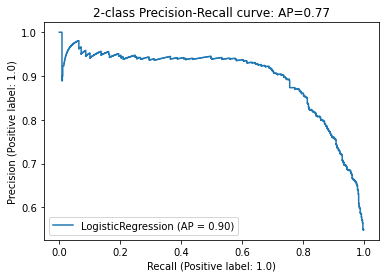

In [56]:
average_precision_logreg = average_precision_score(y_test, y_pred_log)
disp = plot_precision_recall_curve(logreg, X_test_tfi, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision_logreg));

Multinomial Naive Bayes

In [57]:
classifier_MNB = MultinomialNB()
classifier_MNB.fit(X_train_tfi, y_train) 
cv_mn = classifier_MNB.fit(X_train_tfi, y_train) 
  
# predicting test results 
y_pred_mnb = classifier_MNB.predict(X_test_tfi) 

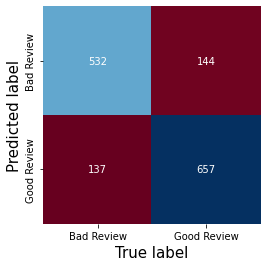

In [58]:
cm = confusion_matrix(y_test, y_pred_mnb) 
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, fmt='d', # fmt='d' is a lifesaver. It gets rid of numbers like 1.8e + 02
xticklabels=['Bad Review', 'Good Review'],
yticklabels=['Bad Review', 'Good Review'])
plt.xlabel('True label', fontsize= 15)
plt.ylabel('Predicted label',fontsize= 15);
     

In [59]:
print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred_mnb)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred_mnb)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred_mnb)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred_mnb, average='micro')))

Accuracy score: 0.81
Precision score: 0.82
Recall score: 0.83
F1 score: 0.81


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.77')

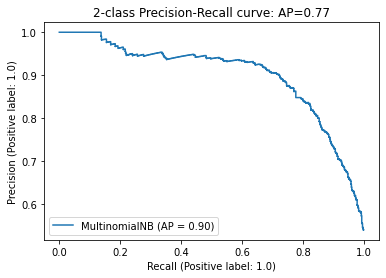

In [60]:
average_precision_mnb = average_precision_score(y_test, y_pred_mnb)
disp = plot_precision_recall_curve(classifier_MNB, X_test_tfi, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision_mnb))

RandomForest Classifier

Text(91.68, 0.5, 'Predicted label')

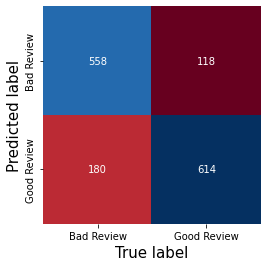

In [61]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train_tfi, y_train)
cv_RF= model_RF.fit(X_train_tfi, y_train)

# predicting test set results 
y_pred_rf = model_RF.predict(X_test_tfi)
# confusion matrix 
cm = confusion_matrix(y_test, y_pred_rf) 

sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, fmt='d',
xticklabels=['Bad Review', 'Good Review'],
yticklabels=['Bad Review', 'Good Review'])
plt.xlabel('True label', fontsize= 15)
plt.ylabel('Predicted label',fontsize= 15)

In [62]:
# cross validation
val = cross_val_score(model_RF, X_train_tfi, y_train, cv=5, scoring='accuracy')
print("cross validation accuracy: ", val.round(2))

cross validation accuracy:  [0.75 0.78 0.78 0.76 0.77]


In [63]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train_tfi, y_train)
round(model_RF.score(X_train_tfi, y_train),2),round(model_RF.score(X_test_tfi, y_test),2)

(0.99, 0.78)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


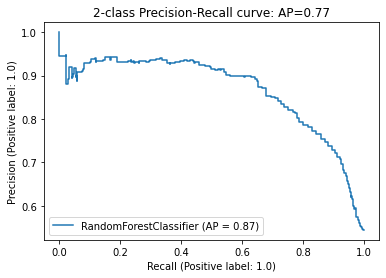

In [64]:
average_precision_rf = average_precision_score(y_test, y_pred_rf)
disp = plot_precision_recall_curve(model_RF, X_test_tfi, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision_rf));

In [65]:
pd.DataFrame({"average_precision":[average_precision_logreg, average_precision_mnb, average_precision_rf]},
              index=["logreg", "classifier_MNB", "model_RF"])

,average_precision
logreg,0.771676
classifier_MNB,0.771897
model_RF,0.771091


In [69]:
predictions = y_pred_mnb

testing_predictions = []
for i in range(len(X_test)):
       if predictions[i] == 1:
        testing_predictions.append(1)
       else:
        testing_predictions.append(0)

check_df = pd.DataFrame({'actual_label': list(y_test), 'prediction': testing_predictions, 'review':list(X_test)})
check_df.head(10)

,actual_label,prediction,review
0,1.0,1,ich habe schon nahezu alle exit spiele von kos...
1,0.0,0,jedoch macht für mich die neue verpackung mit ...
2,0.0,0,ich hatte bei dem produktnamen auf etwas gehof...
3,1.0,0,also es ist wirklich eine super beschäftigung ...
4,0.0,0,gutes spiel aber fehlerhafte produktionbeim ro...
5,1.0,1,good good light ball easy grabperfect
6,0.0,0,das produkt ist keine neuware da dies nicht ge...
7,0.0,0,leider fahren einige bots nicht und für das bi...
8,1.0,1,haben mal wieder ein neues kartenspiel für die...
9,1.0,0,reçu aujourd hui super bien emballé la peluche...
